# Analiza migracji klientów / Churn Analysis

In [ ]:
# Import bibilotek

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from keras import models, layers
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.utils import resample

# Wczytanie i obejrzenie danych

In [ ]:
# Wgranie zbioru danych

path = '/content/drive/MyDrive/SEM2/WUM/WUM_P/Churn Modeling.csv'
churn_data = pd.read_csv(path)
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# Podgląd zbioru danych

churn_data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
churn_data.isnull().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

# EDA

<ipython-input-6-108678de25c3>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(churn_data.corr(),


<Axes: >

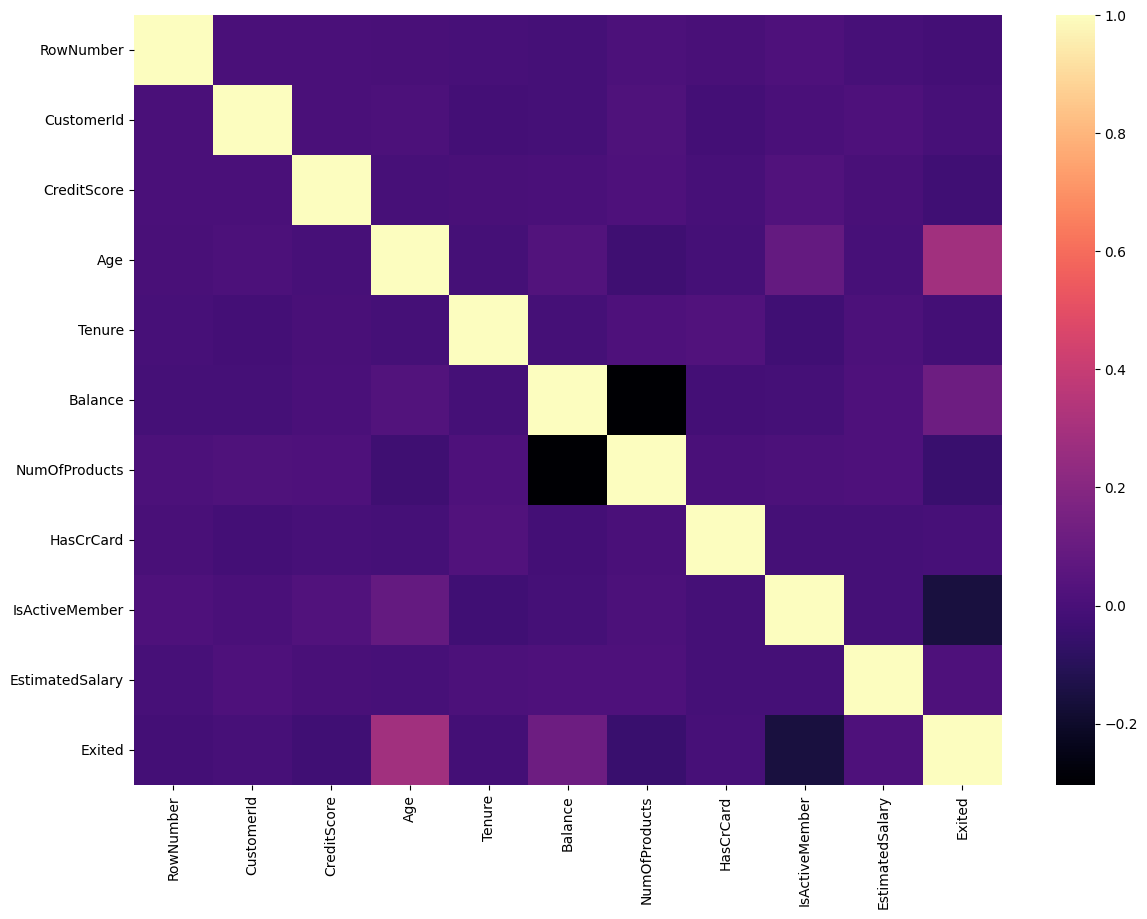

In [ ]:
# Korelacja atrybutów

plt.figure(figsize = (14,10))
sns.heatmap(churn_data.corr(),
            cmap = 'magma')

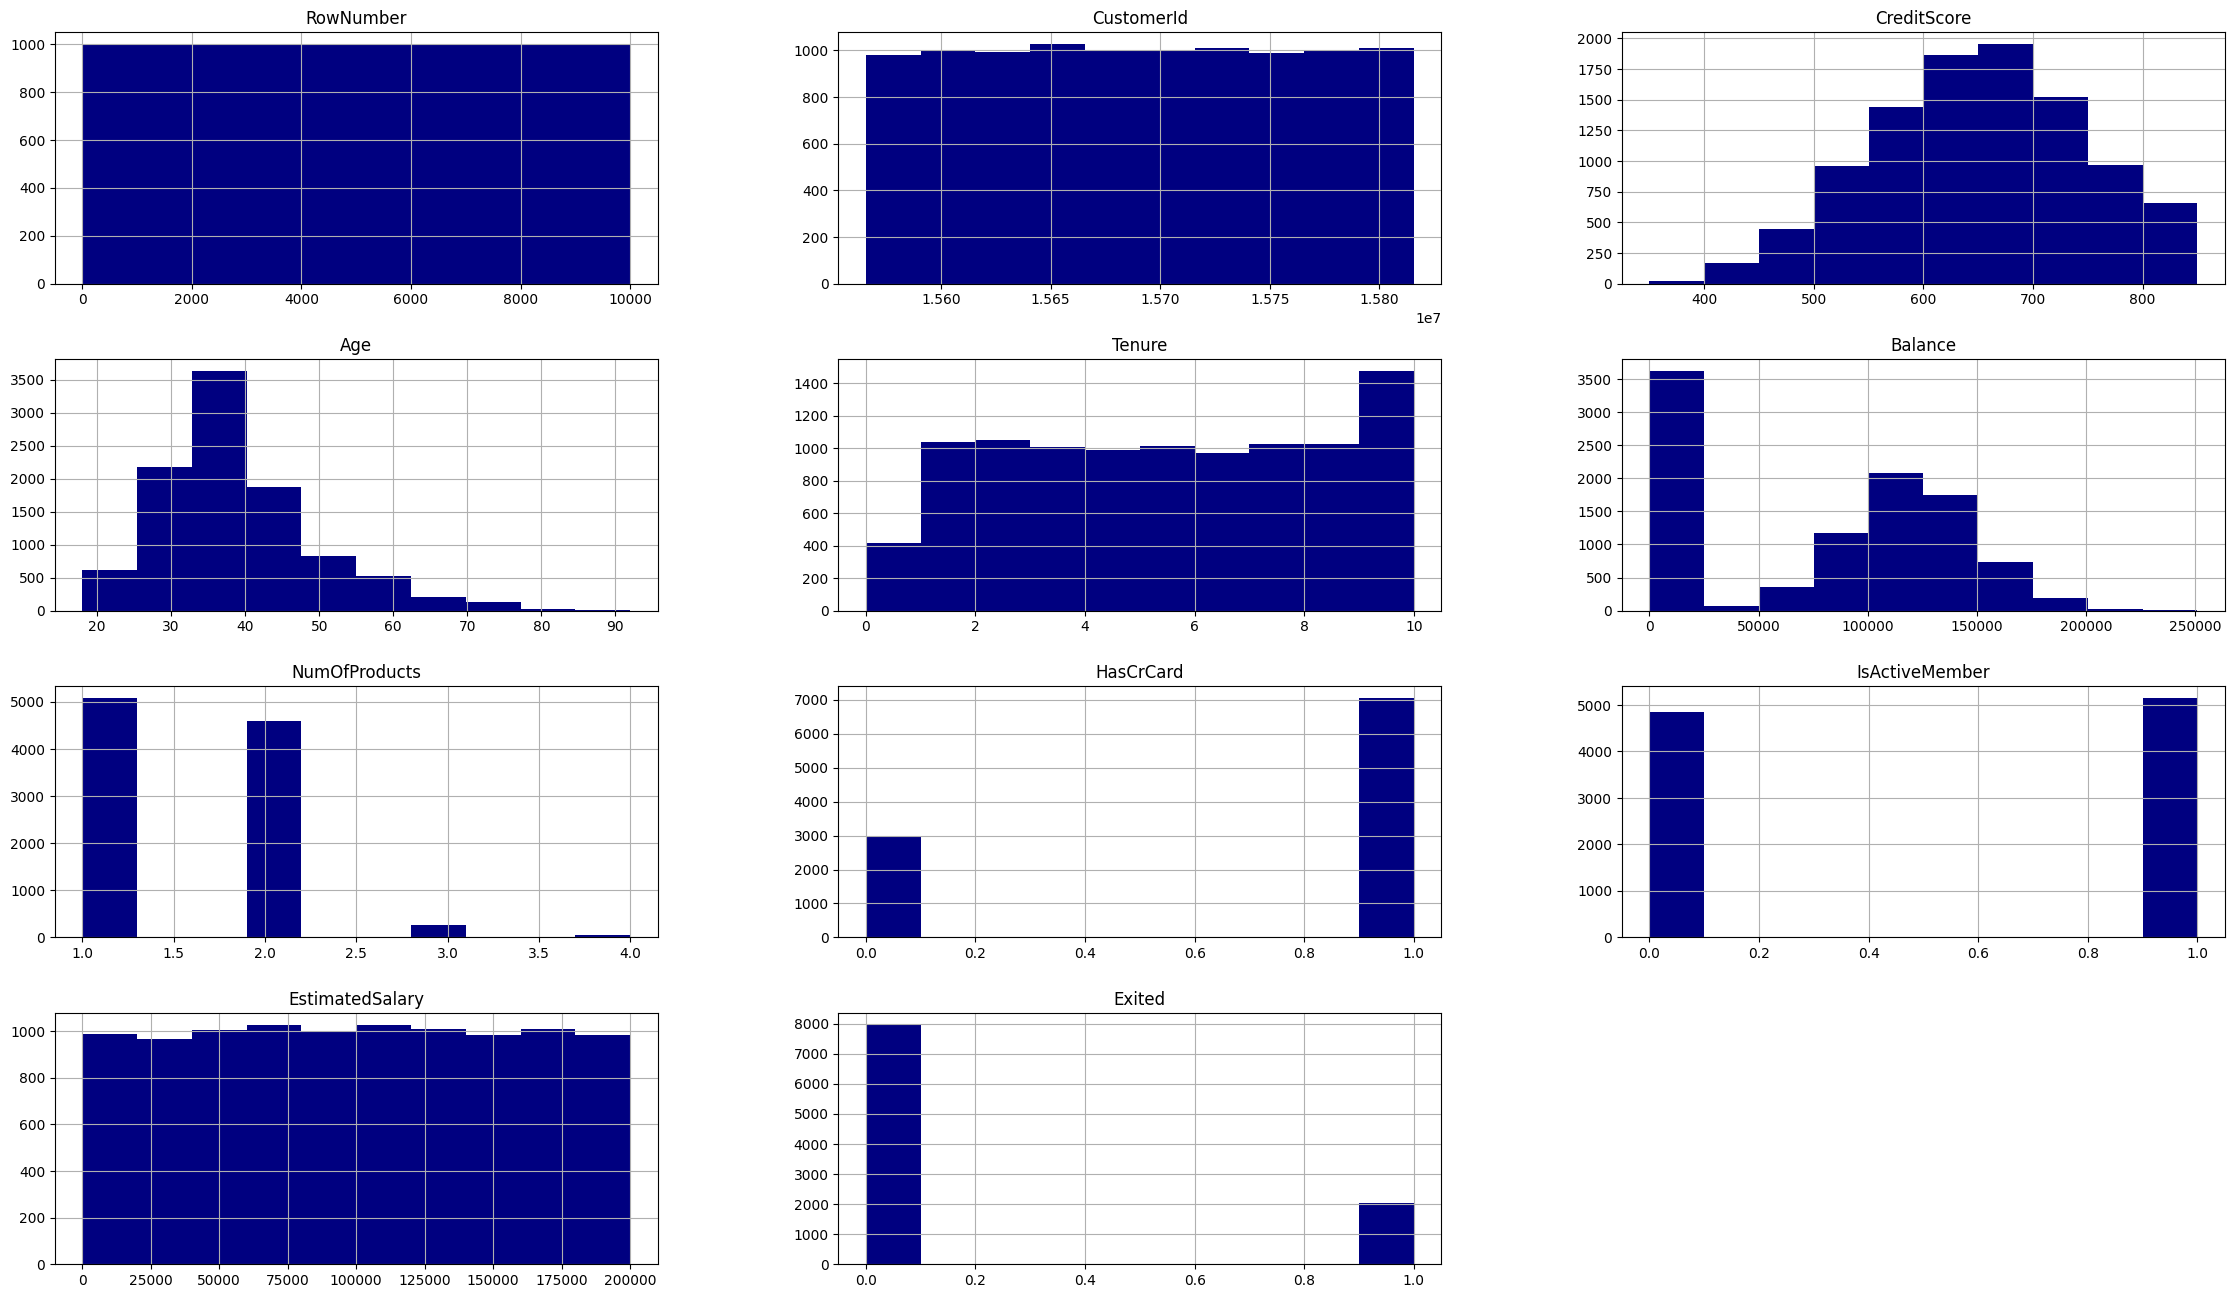

In [ ]:
# Histogram wartości atrybutów

churn_data.hist(figsize=(28,16),
                bins = 10,
                color = 'navy',
                label = 'Histogram wartości atrybutów')

plt.show()

# Obróbka danych

In [ ]:
# Kodowanie zmiennych kategorycznych

list_columns=list(churn_data.columns)

labelEncoder=LabelEncoder()

list_categories=[]
for i in list_columns:
    if churn_data[i].dtype=='object':
        list_categories.append(i)


for i in list_categories:
    churn_data[i]=labelEncoder.fit_transform(churn_data[i])

In [ ]:
# Usunięcie zbędnych informacji

churn_data = churn_data.drop(['RowNumber', 'Surname'],axis=1)

In [ ]:
churn_data

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
# Wyrównanie ilości obu klas w zbiorze danych (OverSampling)

churn_data_majority = churn_data[(churn_data['Exited']==0)]
churn_data_minority = churn_data[(churn_data['Exited']==1)]

# Wygenerowanie nowych danych dla mniej licznej klasy
churn_data_minority_upsampled = resample(churn_data_minority,
                                 replace=True,
                                 n_samples= 8000,
                                 random_state=255)

churn_data = pd.concat([churn_data_minority_upsampled, churn_data_majority])

In [ ]:
# Podział zbioru na treningowy i testowy

y = churn_data['Exited']
x = churn_data.drop('Exited',axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 255)

In [ ]:
# Normalizacja danych

standardScaler = StandardScaler()

x_train = standardScaler.fit_transform(x_train)
x_test = standardScaler.transform(x_test)

In [ ]:
# Definicja zbioru walidacyjnego

x_val = x_train[:1500]
x_train = x_train[1500:]

y_val = y_train[:1500]
y_train = y_train[1500:]

# Budowa i uczenie modelu sieci neuronowej

In [ ]:
# Budowa modelu sieci jednokierunkowej

ffnn_model = models.Sequential([
    layers.Dense(64, 'relu'),
    layers.Dense(32, 'relu'),
    layers.Dense(1, 'sigmoid')
])

ffnn_model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'
                        ,tf.keras.metrics.TrueNegatives(),
                         tf.keras.metrics.FalseNegatives(),
                         tf.keras.metrics.TruePositives(),
                         tf.keras.metrics.FalsePositives(),
                         tf.keras.metrics.Recall(),
                         tf.keras.metrics.Precision()
                         ])

In [ ]:
# Uczenie modelu sieci

ffnn_model_history = ffnn_model.fit(x_train,
                                    y_train,
                                    epochs=20,
                                    batch_size=32,
                                    validation_data=(x_val, y_val))

Epoch 1/20
403/403 [==============================] - 3s 4ms/step - loss: 0.5603 - accuracy: 0.7134 - true_negatives_3: 4482.0000 - false_negatives_3: 1771.0000 - true_positives_3: 4696.0000 - false_positives_3: 1917.0000 - recall_1: 0.7261 - precision_1: 0.7101 - val_loss: 0.5004 - val_accuracy: 0.7620 - val_true_negatives_3: 528.0000 - val_false_negatives_3: 136.0000 - val_true_positives_3: 615.0000 - val_false_positives_3: 221.0000 - val_recall_1: 0.8189 - val_precision_1: 0.7356
Epoch 2/20
403/403 [==============================] - 1s 2ms/step - loss: 0.4869 - accuracy: 0.7622 - true_negatives_3: 4787.0000 - false_negatives_3: 1447.0000 - true_positives_3: 5020.0000 - false_positives_3: 1612.0000 - recall_1: 0.7762 - precision_1: 0.7569 - val_loss: 0.4664 - val_accuracy: 0.7767 - val_true_negatives_3: 567.0000 - val_false_negatives_3: 153.0000 - val_true_positives_3: 598.0000 - val_false_positives_3: 182.0000 - val_recall_1: 0.7963 - val_precision_1: 0.7667
Epoch 3/20
403/403 [====

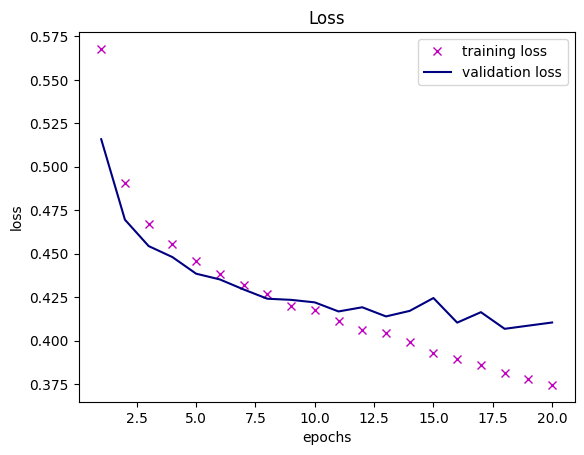

In [ ]:
# Wykres zmian straty w czasie uczenia modelu

history_dict = ffnn_model_history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1,len(loss_values)+1)
plt.plot(epochs, loss_values, "mx", label='training loss')
plt.plot(epochs, val_loss_values, "navy", label = 'validation loss')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title('Loss')
plt.legend()

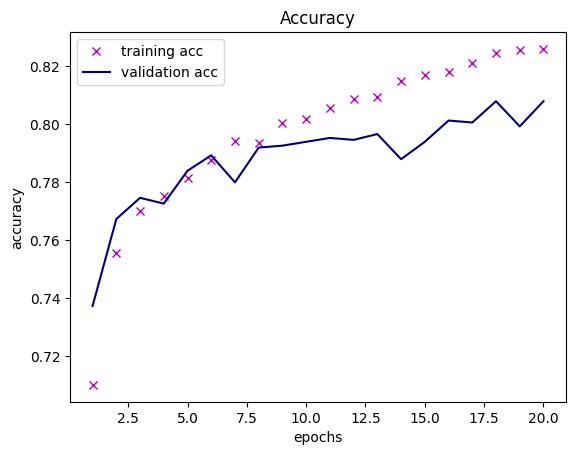

In [ ]:
# Wykres zmian dokładności w czasie uczenia modelu

history_dict = ffnn_model_history.history
acc = history_dict["accuracy"]
val_acc_values = history_dict["val_accuracy"]
epochs = range(1,len(loss_values)+1)
plt.plot(epochs, acc, "mx", label='training acc')
plt.plot(epochs, val_acc_values, "navy", label = 'validation acc')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title('Accuracy')
plt.legend()

# Regularyzacja

**Wczesne zatrzymywanie (Early stopping)**

Model zaczyna się przetrenowywać w okolicach 7 epoki. Jest to widoczne, gdyż dokładność na wykresie na zbiorze testowym w tym miejscu jest największa po czym zaczyna spadać, a na zbiorze treningowym wciąż rośnie. Podobne zjawisko widać na wykresie straty, z tym, że zamiast spadać wzrasta.

Nowa liczba epok: 7 (wybór ręczny na podstawie wykresów dokładności i straty)

Nowa liczba epok: 7 (wybór poprzez wywołanie metody callbacks.EarlyStopping z biblioteki tf.keras)

In [ ]:
# Budowa zregularyzowanej sieci FFNN

# callback - wykorzystanie wczesnego zatrzymywania
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)

es_ffnn_model = models.Sequential([
    layers.Dense(64, 'relu'),
    layers.Dense(32, 'relu'),
    layers.Dense(1, 'sigmoid')
])

es_ffnn_model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [ ]:
es_ffnn_model_history = es_ffnn_model.fit(x_train,
                                        y_train,
                                        epochs=20,
                                        batch_size=32,
                                        validation_data=(x_val, y_val),
                                        callbacks=callback)

Epoch 1/20
403/403 [==============================] - 1s 2ms/step - loss: 0.5576 - accuracy: 0.7125 - val_loss: 0.5019 - val_accuracy: 0.7533
Epoch 2/20
403/403 [==============================] - 1s 1ms/step - loss: 0.4838 - accuracy: 0.7598 - val_loss: 0.4674 - val_accuracy: 0.7867
Epoch 3/20
403/403 [==============================] - 1s 1ms/step - loss: 0.4651 - accuracy: 0.7707 - val_loss: 0.4596 - val_accuracy: 0.7813
Epoch 4/20
403/403 [==============================] - 1s 1ms/step - loss: 0.4527 - accuracy: 0.7805 - val_loss: 0.4541 - val_accuracy: 0.7880
Epoch 5/20
403/403 [==============================] - 1s 1ms/step - loss: 0.4441 - accuracy: 0.7839 - val_loss: 0.4447 - val_accuracy: 0.7847
Epoch 6/20
403/403 [==============================] - 1s 1ms/step - loss: 0.4385 - accuracy: 0.7890 - val_loss: 0.4459 - val_accuracy: 0.7860
Epoch 7/20
403/403 [==============================] - 1s 1ms/step - loss: 0.4315 - accuracy: 0.7933 - val_loss: 0.4406 - val_accuracy: 0.7833


**GridSearch**

In [ ]:
# Szukanie wartości hiperparametrów metodą GridSearch

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

# Budowa funkcji modelu sieci
def get_FFNN_model(neurons = None):

    model = models.Sequential([
    layers.Dense(64, 'relu'),
    layers.Dense(units = neurons, activation = 'relu'),
    layers.Dense(1, 'sigmoid')
    ])

    model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

    return model


# Budowa modelu do GridSearch
model = KerasClassifier(build_fn=get_FFNN_model)

# Definicja parametrów do GridSearch
batch_size =  [8 ,16 ,32, 64, 128, 256]
epochs = [8, 10, 12, 14, 16]
neurons = [32, 64, 128, 256]
param_grid = dict(batch_size=batch_size, epochs=epochs,neurons=neurons)

# Wywołanie GridSearch
grid = GridSearchCV(estimator=model,
                    param_grid=param_grid,
                    n_jobs=-1,
                    cv=3)
grid_result = grid.fit(x_val, y_val)

# Wyniki GridSearch
print("Best: %f using %s\n" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

<ipython-input-22-4f5c8862099d>:23: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=get_FFNN_model)


Epoch 1/16
188/188 [==============================] - 1s 2ms/step - loss: 0.6277 - accuracy: 0.6507
Epoch 2/16
188/188 [==============================] - 0s 1ms/step - loss: 0.5525 - accuracy: 0.7267
Epoch 3/16
188/188 [==============================] - 0s 2ms/step - loss: 0.5106 - accuracy: 0.7527
Epoch 4/16
188/188 [==============================] - 0s 2ms/step - loss: 0.4804 - accuracy: 0.7793
Epoch 5/16
188/188 [==============================] - 0s 1ms/step - loss: 0.4576 - accuracy: 0.7807
Epoch 6/16
188/188 [==============================] - 0s 2ms/step - loss: 0.4386 - accuracy: 0.7940
Epoch 7/16
188/188 [==============================] - 0s 2ms/step - loss: 0.4257 - accuracy: 0.7993
Epoch 8/16
188/188 [==============================] - 0s 1ms/step - loss: 0.4119 - accuracy: 0.8087
Epoch 9/16
188/188 [==============================] - 0s 1ms/step - loss: 0.4019 - accuracy: 0.8233
Epoch 10/16
188/188 [==============================] - 0s 1ms/step - loss: 0.3887 - accuracy: 0.8333

**Budowa modelu sieci neuronowej w oparciu o wykonaną regularyzację**

Parametry dające najlepsze wyniki:

*   batch_size = 8
*   epochs = 16
*   neurons = 64




In [ ]:
# Budowa finalnej zregularyzowanej sieci neuronowej

# callback - wykorzystanie wczesnego zatrzymywania
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10)

final_ffnn_model = models.Sequential([
    layers.Dense(64, 'relu'),
    layers.Dense(64, 'relu'),
    layers.Dense(1, 'sigmoid')
])

final_ffnn_model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'
                         ,tf.keras.metrics.TrueNegatives(),
                         tf.keras.metrics.FalseNegatives(),
                         tf.keras.metrics.TruePositives(),
                         tf.keras.metrics.FalsePositives(),
                         tf.keras.metrics.Recall(),
                         tf.keras.metrics.Precision()
                         ])


final_ffnn_model_history = final_ffnn_model.fit(x_train,
                                                y_train,
                                                epochs=16,
                                                batch_size=8,
                                                validation_data=(x_val, y_val)
                                                ,callbacks = callback)

Epoch 1/16
1609/1609 [==============================] - 6s 3ms/step - loss: 0.5163 - accuracy: 0.7370 - true_negatives_4: 4728.0000 - false_negatives_4: 1713.0000 - true_positives_4: 4754.0000 - false_positives_4: 1671.0000 - recall_2: 0.7351 - precision_2: 0.7399 - val_loss: 0.4656 - val_accuracy: 0.7693 - val_true_negatives_4: 608.0000 - val_false_negatives_4: 205.0000 - val_true_positives_4: 546.0000 - val_false_positives_4: 141.0000 - val_recall_2: 0.7270 - val_precision_2: 0.7948
Epoch 2/16
1609/1609 [==============================] - 3s 2ms/step - loss: 0.4658 - accuracy: 0.7731 - true_negatives_4: 4983.0000 - false_negatives_4: 1503.0000 - true_positives_4: 4964.0000 - false_positives_4: 1416.0000 - recall_2: 0.7676 - precision_2: 0.7781 - val_loss: 0.4520 - val_accuracy: 0.7860 - val_true_negatives_4: 616.0000 - val_false_negatives_4: 188.0000 - val_true_positives_4: 563.0000 - val_false_positives_4: 133.0000 - val_recall_2: 0.7497 - val_precision_2: 0.8089
Epoch 3/16
1609/1609

# Model referencyjny - Budowa i uczenie

**Klasyfikator Drzewa Losowego (RandomForest)**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier()

# Ewaluacja

**Klasyfikator RandomForest**

In [ ]:
# Metryki dla klasyfikatora RandomForest

print(classification_report(y_test, rfc.predict(x_test), labels=rfc.classes_))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96       815
           1       0.93      0.99      0.96       782

    accuracy                           0.96      1597
   macro avg       0.96      0.96      0.96      1597
weighted avg       0.96      0.96      0.96      1597



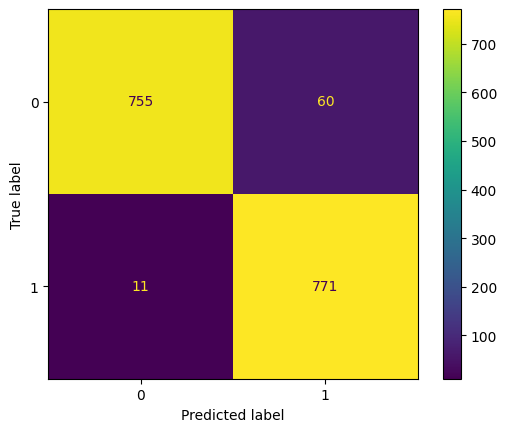

In [ ]:
# Macierz omyłek dla klasyfikatora RandomForest

cm = confusion_matrix(y_test, rfc.predict(x_test), labels=rfc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rfc.classes_)
disp.plot()

**Klasyfikator jednokierunkowej sieci neuronowej**

Model sieci bez regularyzacji

In [ ]:
# Ewaluacja modelu sieci neuronowej

ffnn_model.evaluate(x_test, y_test)

50/50 [==============================] - 0s 1ms/step - loss: 0.4125 - accuracy: 0.8053 - true_negatives_3: 650.0000 - false_negatives_3: 146.0000 - true_positives_3: 636.0000 - false_positives_3: 165.0000 - recall_1: 0.8133 - precision_1: 0.7940


[0.41252535581588745,
 0.8052598834037781,
 650.0,
 146.0,
 636.0,
 165.0,
 0.8132992386817932,
 0.7940074801445007]

Model zregularyzowanej sieci

In [ ]:
# Ewaluacja modelu sieci neuronowej

final_ffnn_model.evaluate(x_test, y_test)

50/50 [==============================] - 0s 1ms/step - loss: 0.3810 - accuracy: 0.8341 - true_negatives_4: 683.0000 - false_negatives_4: 133.0000 - true_positives_4: 649.0000 - false_positives_4: 132.0000 - recall_2: 0.8299 - precision_2: 0.8310


[0.3809530436992645,
 0.8340638875961304,
 683.0,
 133.0,
 649.0,
 132.0,
 0.8299232721328735,
 0.8309859037399292]